# Data Acquisition

In [1]:
import requests
import json

In [57]:
base_url = 'https://official-joke-api.appspot.com/jokes/random/250'

In [58]:
response = requests.get(base_url)
response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
data = response.json()
print(json.dumps(data, indent=2))

[
  {
    "type": "general",
    "setup": "I started a new business making yachts in my attic this year...",
    "punchline": "The sails are going through the roof.",
    "id": 67
  },
  {
    "type": "general",
    "setup": "What did the Zen Buddist say to the hotdog vendor?",
    "punchline": "Make me one with everything.",
    "id": 186
  },
  {
    "type": "programming",
    "setup": "Why did the programmer bring a broom to work?",
    "punchline": "To clean up all the bugs.",
    "id": 446
  },
  {
    "type": "general",
    "setup": "How many lips does a flower have?",
    "punchline": "Tulips",
    "id": 8
  },
  {
    "type": "general",
    "setup": "What is red and smells like blue paint?",
    "punchline": "Red paint!",
    "id": 243
  },
  {
    "type": "general",
    "setup": "Why did the coffee file a police report?",
    "punchline": "It got mugged.",
    "id": 431
  },
  {
    "type": "general",
    "setup": "What do you call two barracuda fish?",
    "punchline": "A Pai

# Data Preparation & Cleaning

In [59]:
import pandas as pd

jokes_df = pd.DataFrame(data)
display(jokes_df.head())

,type,setup,punchline,id
0,general,I started a new business making yachts in my a...,The sails are going through the roof.,67
1,general,What did the Zen Buddist say to the hotdog ven...,Make me one with everything.,186
2,programming,Why did the programmer bring a broom to work?,To clean up all the bugs.,446
3,general,How many lips does a flower have?,Tulips,8
4,general,What is red and smells like blue paint?,Red paint!,243


In [ ]:
jokes_df.to_csv('jokes_data_1.csv', index=False)

In [ ]:
jokes_df.to_csv('jokes_data_2.csv', index=False)

In [63]:
import pandas as pd

# Load the first dataset
jokes_df_1 = pd.read_csv('jokes_data_1.csv')
print("Shape of jokes_df_1:", jokes_df_1.shape)

# Load the second dataset
jokes_df_2 = pd.read_csv('jokes_data_2.csv')
print("Shape of jokes_df_2:", jokes_df_2.shape)

# Combine the two DataFrames
jokes_df = pd.concat([jokes_df_1, jokes_df_2], ignore_index=True)

print("\nShape of combined_jokes_df:", jokes_df.shape)
display(jokes_df.head())

Shape of jokes_df_1: (250, 4)
Shape of jokes_df_2: (250, 4)

Shape of combined_jokes_df: (500, 4)


,type,setup,punchline,id
0,programming,How do you generate a random string?,Put a Windows user in front of Vim and tell th...,405
1,general,Bad at golf?,Join the club.,79
2,general,What is a tornado's favorite game to play?,Twister!,240
3,knock-knock,Knock knock. \n Who's there? \n A broken penci...,Never mind. It's pointless.,11
4,general,Which side of the chicken has more feathers?,The outside.,295


In [64]:
jokes_df.to_csv('jokes_dataset.csv', index=False)

In [66]:
print("Shape of the DataFrame (rows, columns):", jokes_df.shape)
print("\n--- DataFrame Information ---\n")
jokes_df.info()
print("\n--- Missing Values Count ---\n")
print(jokes_df.isnull().sum())

Shape of the DataFrame (rows, columns): (500, 4)

--- DataFrame Information ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       500 non-null    object
 1   setup      500 non-null    object
 2   punchline  500 non-null    object
 3   id         500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB

--- Missing Values Count ---

type         0
setup        0
punchline    0
id           0
dtype: int64


# Checking and Removing Duplicates

In [75]:
print(f"Number of jokes before removing duplicates: {jokes_df.shape[0]}")

# Remove duplicates based on 'setup' and 'punchline'
jokes_df.drop_duplicates(subset=['setup', 'punchline'], inplace=True)

print(f"Number of jokes after removing duplicates: {jokes_df.shape[0]}")

# Ensure this cleaned DataFrame is used for further analysis

display(jokes_df.head())

Number of jokes before removing duplicates: 371
Number of jokes after removing duplicates: 371


,type,setup,punchline,id,setup_length,punchline_length
0,programming,How do you generate a random string?,Put a Windows user in front of Vim and tell th...,405,36,57
1,general,Bad at golf?,Join the club.,79,12,14
2,general,What is a tornado's favorite game to play?,Twister!,240,42,8
3,knock-knock,Knock knock. \n Who's there? \n A broken penci...,Never mind. It's pointless.,11,69,27
4,general,Which side of the chicken has more feathers?,The outside.,295,44,12


# Exploratory Data Analysis (EDA) & Visualization

In [68]:
joke_type_distribution = jokes_df['type'].value_counts()
print(joke_type_distribution)

type
general        312
programming     53
knock-knock      4
dad              2
Name: count, dtype: int64


### Joke Type Distribution

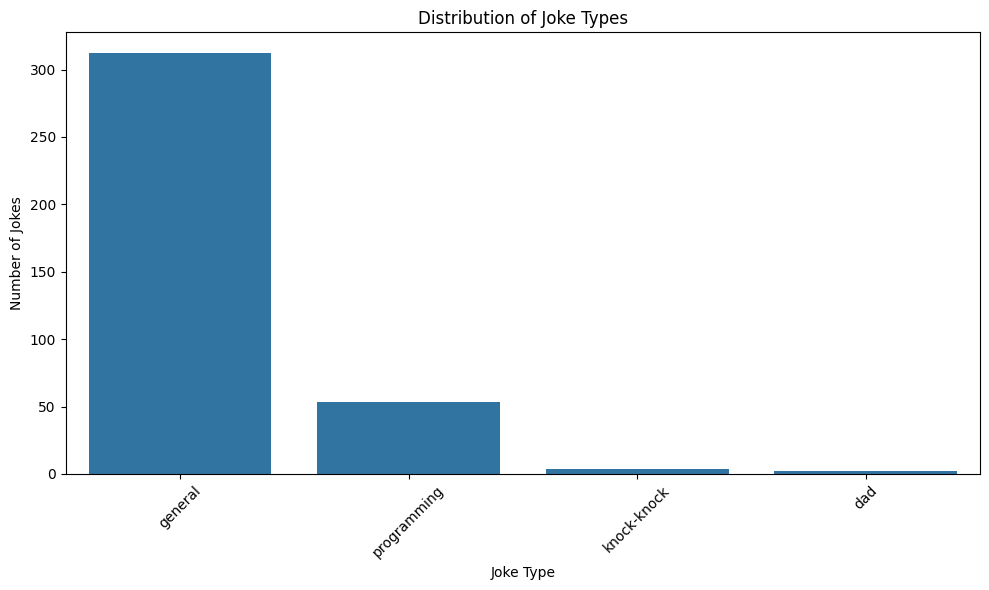

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=joke_type_distribution.index, y=joke_type_distribution.values)
plt.title('Distribution of Joke Types')
plt.xlabel('Joke Type')
plt.ylabel('Number of Jokes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Text Length Analysis


In [70]:
jokes_df['setup_length'] = jokes_df['setup'].str.len()
jokes_df['punchline_length'] = jokes_df['punchline'].str.len()
display(jokes_df.head())

,type,setup,punchline,id,setup_length,punchline_length
0,programming,How do you generate a random string?,Put a Windows user in front of Vim and tell th...,405,36,57
1,general,Bad at golf?,Join the club.,79,12,14
2,general,What is a tornado's favorite game to play?,Twister!,240,42,8
3,knock-knock,Knock knock. \n Who's there? \n A broken penci...,Never mind. It's pointless.,11,69,27
4,general,Which side of the chicken has more feathers?,The outside.,295,44,12


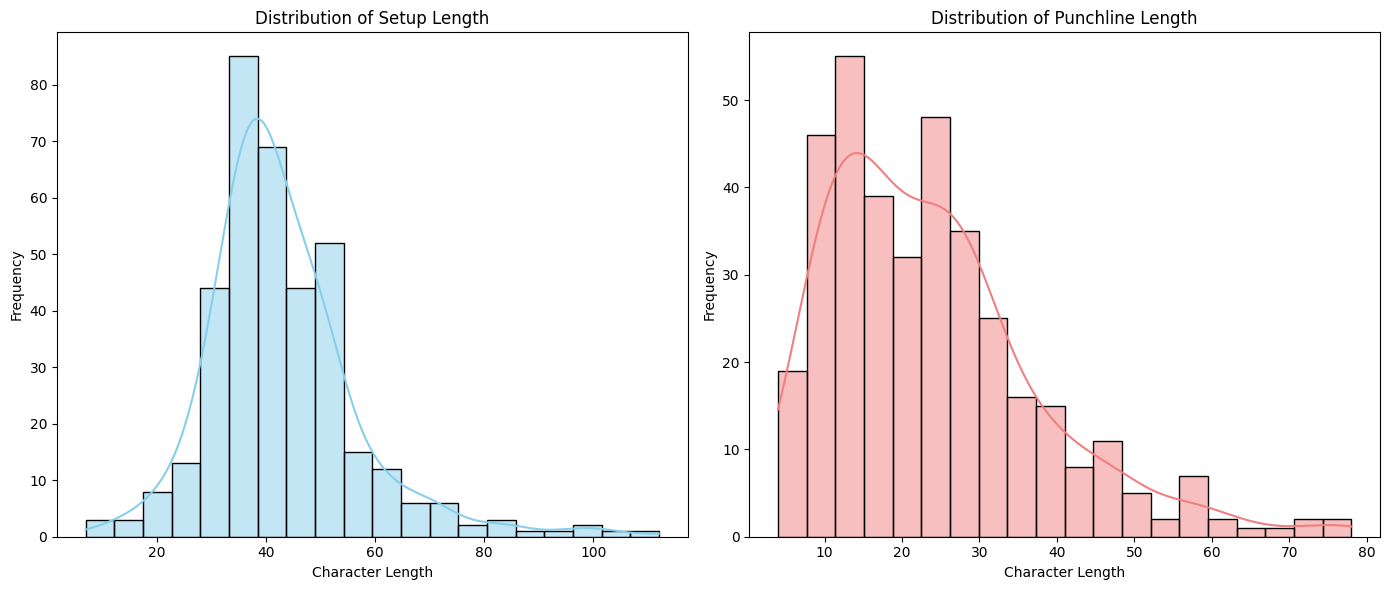

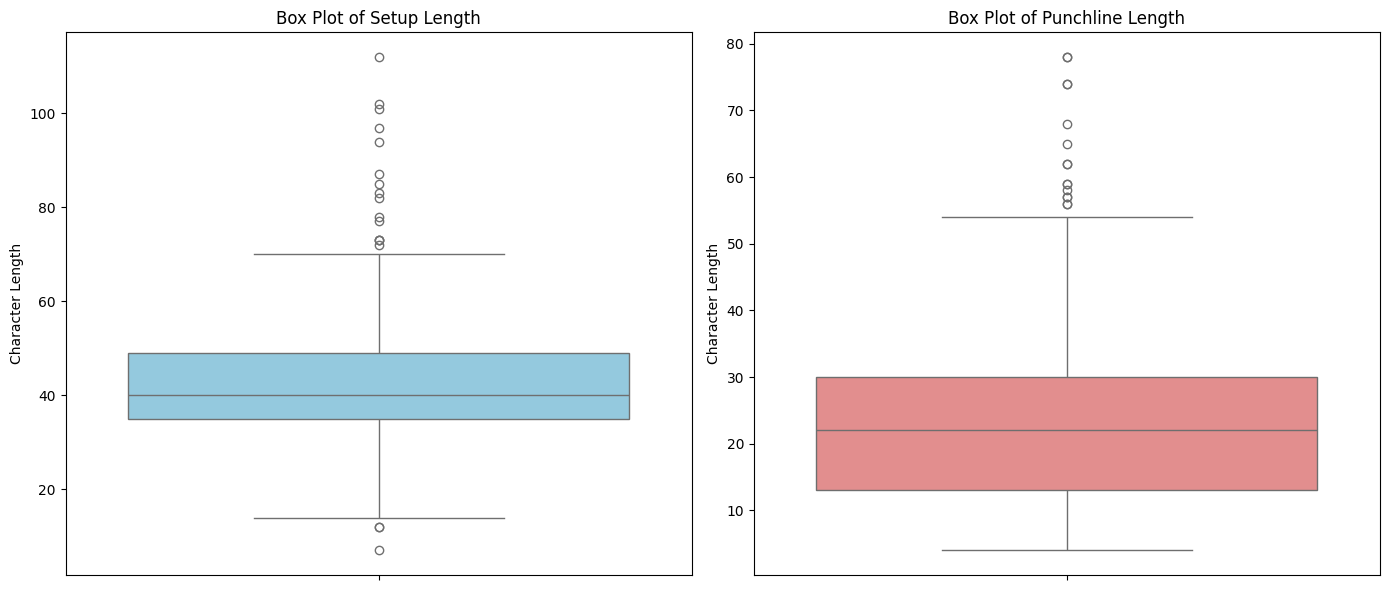

In [71]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(jokes_df['setup_length'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Setup Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(jokes_df['punchline_length'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Punchline Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=jokes_df['setup_length'], color='skyblue')
plt.title('Box Plot of Setup Length')
plt.ylabel('Character Length')

plt.subplot(1, 2, 2)
sns.boxplot(y=jokes_df['punchline_length'], color='lightcoral')
plt.title('Box Plot of Punchline Length')
plt.ylabel('Character Length')

plt.tight_layout()
plt.show()

### Advanced Text Analysis: Word Frequency


In [72]:
from collections import Counter
import re

# Define a list of common English stopwords
stopwords = set([
    'the', 'a', 'is', 'to', 'and', 'in', 'of', 'for', 'on', 'what', 'do', 'you', 'how', 'it', 'with',
    'that', 'he', 'she', 'they', 'i', 'me', 'my', 'we', 'us', 'our', 'what', 'who', 'where', 'when',
    'why', 'can', 'not', 'did', 'get', 'was', 'were', 'had', 'have', 'from', 'but', 'or', 'at', 'this',
    'an', 'be', 'by', 'as', 'will', 'say', 'go', 'up', 'down', 'out', 'off', 'just', 'so', 'if', 'about',
    'all', 'any', 'new', 'old', 'much', 'more', 'most', 'very', 'than', 'then', 'there', 'here', 'into',
    'like', 'such', 'only', 'even', 'over', 'under', 'also', 'back', 'just', 'make', 'made', 'has', 'one',
    'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'its', 'their', 'your', 'his',
    'her', 'them', 'been', 'which', 'had', 'been', 'would', 'could', 'should', 'wouldn', 'couldn', 'shouldn',
    'don', 'doesn', 'didn', 'won', 'wasn', 'weren', 'isn', 'aren', 'haven', 'hasn', 'couldn', 'hadn', 'mustn',
    'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn', 'ain', 'aren', 'can', 'could', 'didn', 'doesn',
    'don', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won',
    'wouldn', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn',
    'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
])

# Create a function to preprocess text
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
    words = text.split() # Split into words
    words = [word for word in words if word not in stopwords and len(word) > 1] # Remove stopwords and single characters
    return words

# Apply preprocessing to 'setup' and 'punchline' columns
all_setup_words = []
for setup_text in jokes_df['setup']:
    all_setup_words.extend(preprocess_text(setup_text))

all_punchline_words = []
for punchline_text in jokes_df['punchline']:
    all_punchline_words.extend(preprocess_text(punchline_text))

# Find the 20 most common words in 'setup'
most_common_setup_words = Counter(all_setup_words).most_common(20)

# Find the 20 most common words in 'punchline'
most_common_punchline_words = Counter(all_punchline_words).most_common(20)

# Print the results
print("\nMost common words in 'setup' phrases:")
for word, count in most_common_setup_words:
    print(f"- {word}: {count}")

print("\nMost common words in 'punchline' phrases:")
for word, count in most_common_punchline_words:
    print(f"- {word}: {count}")


Most common words in 'setup' phrases:
- call: 43
- does: 26
- hear: 24
- whats: 22
- are: 13
- many: 9
- take: 9
- knock: 8
- man: 8
- joke: 8
- kind: 8
- dont: 8
- cross: 8
- programmer: 8
- other: 7
- know: 7
- between: 7
- wear: 7
- cant: 7
- programmers: 7

Most common words in 'punchline' phrases:
- because: 51
- dont: 15
- know: 11
- no: 10
- got: 8
- didnt: 8
- little: 7
- too: 7
- are: 7
- case: 7
- see: 6
- always: 6
- never: 5
- really: 5
- im: 5
- theyre: 5
- tooth: 5
- mind: 4
- use: 4
- wasnt: 4


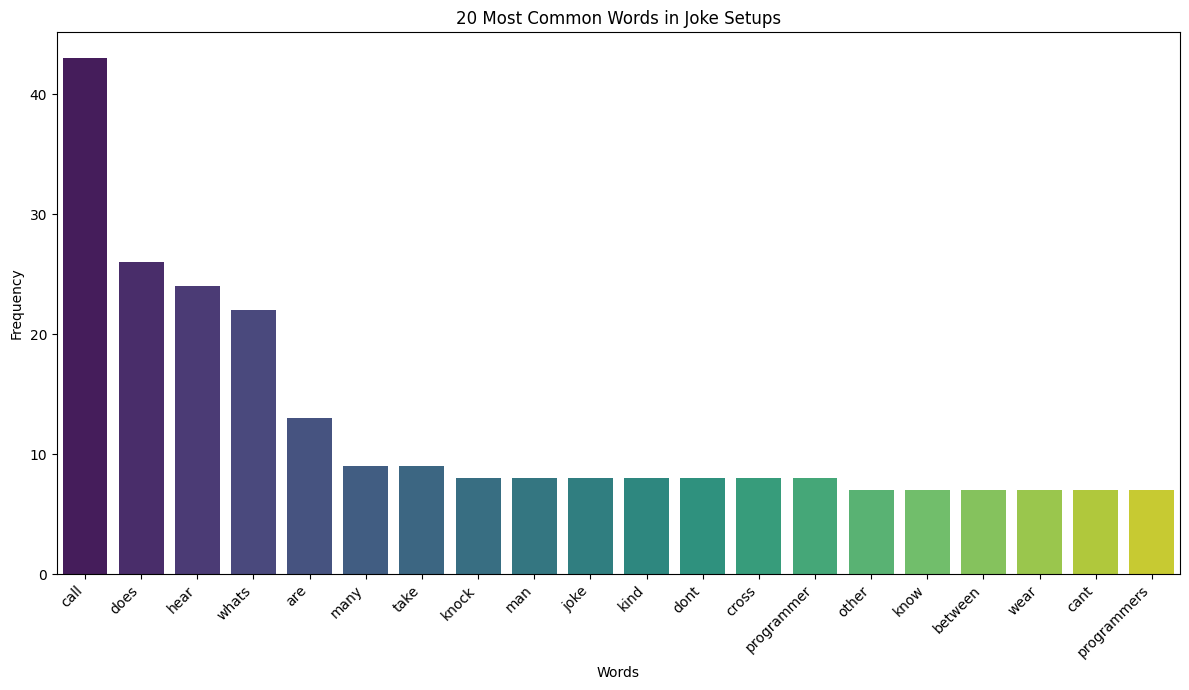

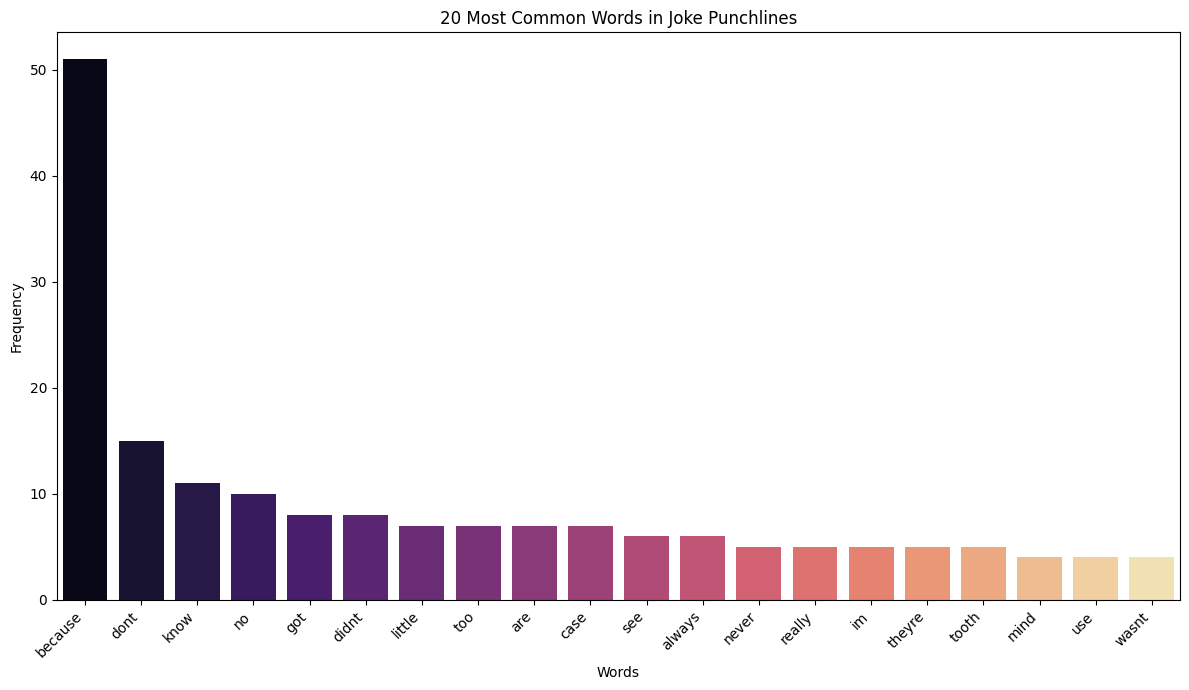

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize most common words in 'setup'
plt.figure(figsize=(12, 7))
sns.barplot(x=[word for word, count in most_common_setup_words], y=[count for word, count in most_common_setup_words], hue=[word for word, count in most_common_setup_words], palette='viridis', legend=False)
plt.title('20 Most Common Words in Joke Setups')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize most common words in 'punchline'
plt.figure(figsize=(12, 7))
sns.barplot(x=[word for word, count in most_common_punchline_words], y=[count for word, count in most_common_punchline_words], hue=[word for word, count in most_common_punchline_words], palette='magma', legend=False)
plt.title('20 Most Common Words in Joke Punchlines')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary & Conclusion

This analysis successfully uncovered several key characteristics of the joke dataset:

### Key Findings

* **Data Quality:** The deduplication process was critical, reducing the dataset by 25.8% (from 500 to 371) and ensuring the validity of the analysis.
* **Joke Composition:** The dataset primarily consists of 'general' jokes (84% of the unique data).
* **Joke Structure:** A clear pattern emerged where **setups** (avg. 40-50 chars) are consistently longer than punchlines (avg. 20-30 chars).
* **Linguistic Patterns:** Jokes are often structured as question-and-answer. Setups use inquisitive words ("whats," "does"), and punchlines provide an explanation, often starting with ("because").

### Recommended Next Steps

* Perform **sentiment analysis** to rate the "darkness" or "lightness" of the jokes.
* Analyze the correlation between joke type and text length.
* Use this dataset as baseline training data for a text-generation (NLP) model to create new jokes.